### Importing Libraries

In [28]:
# basic operations
import numpy as np

# dataframe manipulation
import pandas as pd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# background style for plots
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16,7)

In [29]:
import warnings
warnings.filterwarnings('ignore')

### Reading the Data

In [30]:
# import the data
data = pd.read_csv('C:/Users/Dell/Desktop/EDA on Finance Data/startup_funding.csv')

In [31]:
# changing the names of the columns
data.columns = ["SNo","Date","StartupName","IndustryVertical","SubVertical","City","InvestorsName","InvestmentType","AmountInUSD","Remarks"]

# function to clean the strings
def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0","")

# apply the function to clean the data
for col in ["SNo","Date","StartupName","IndustryVertical","SubVertical","City","InvestorsName","InvestmentType","AmountInUSD","Remarks"]:
    data[col] = data[col].apply(lambda x: clean_string(x))

# head of the data
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [32]:
# shape of data
data.shape

(3044, 10)

### Data Cleaning

In [33]:
# checking missing values in data
missing_data = data.isnull().sum()
missing_data

SNo                 0
Date                0
StartupName         0
IndustryVertical    0
SubVertical         0
City                0
InvestorsName       0
InvestmentType      0
AmountInUSD         0
Remarks             0
dtype: int64

In [34]:
# removing unwanted columns
data = data.drop(['Remarks'],axis=1)
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

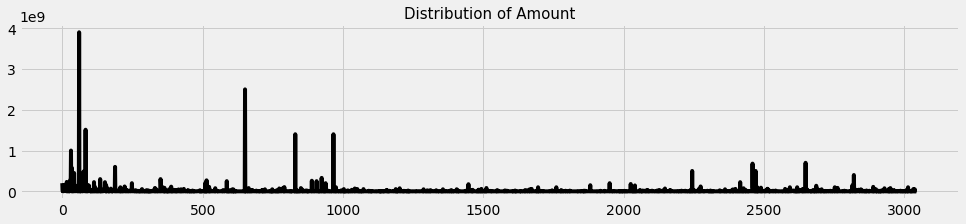

In [35]:
# converting amount column into numerical to analyze values in it

# function to clean AmountInUSD
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0','1','2','3','4','5','6','7','8','9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n\a","")
    x = str(x).lower().replace("unknown","")
    if x=='':
        x='-999'
    return x
    
# apply function on the column
data['AmountInUSD'] = data['AmountInUSD'].apply(lambda x: float(clean_amount(x)))

# plotting the amount distribution
plt.rcParams['figure.figsize'] = (15,3)
data['AmountInUSD'].plot(kind='line',color='black')
plt.title('Distribution of Amount',fontsize=15)
plt.show()


In [36]:
# cleaning the dates
data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

### Query Analysis

#### How does the Funding Ecosystem changes with respect to time?

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64
Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


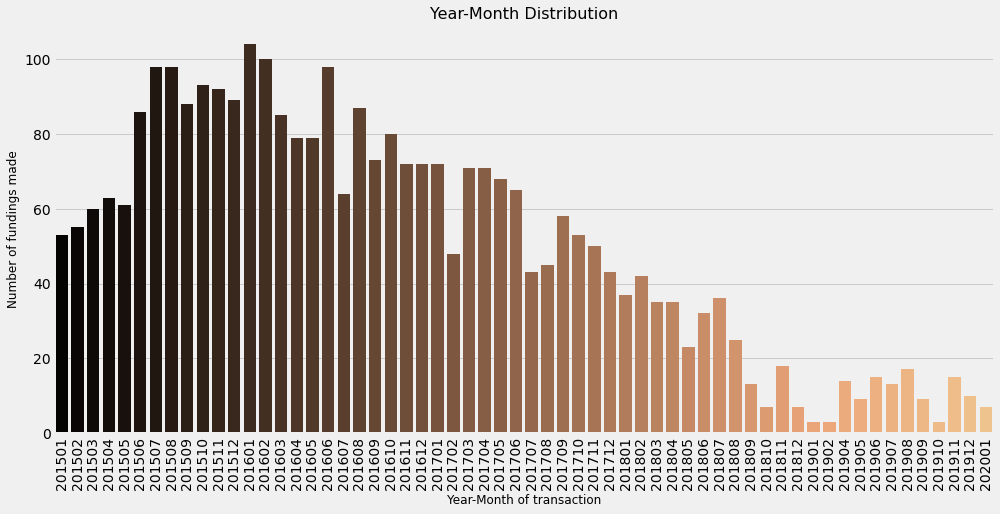

In [37]:
# converting date formats into Datetime object
data["yearmonth"] = (pd.to_datetime(data['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)


temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = data['yearmonth'].value_counts()

temp = data['yearmonth'].value_counts().sort_values(ascending=False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)

# Plot the data
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(year_month.index, year_month.values, palette='copper')
plt.xticks(rotation=90)
plt.xlabel('Year-Month of transaction',fontsize=12)
plt.ylabel('Number of fundings made',fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

#### What is the General Amount that Startups get in India?

In [38]:
# check the maximum funding of a startup
print("Maximum amount of startup is: ",data["AmountInUSD"].dropna().sort_values().max())

Maximum amount of startup is:  3900000000.0


In [39]:
# check the average funding of a startup
print("Maximum amount of startup is: ",data["AmountInUSD"].dropna().sort_values().mean())

Maximum amount of startup is:  13270058.261169514


In [40]:
# check the startups with more than 50 crore+ fundings
@interact
def check(column='AmountInUSD', x=500000000):
    return data[data[column]>x].sort_values(by='AmountInUSD',ascending=False)

interactive(children=(Text(value='AmountInUSD', description='column'), IntSlider(value=500000000, description=…

In [41]:
# check different ventures of Rapido Bike Taxi
data[data.StartupName=='Rapido Bike Taxi']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
60,61,27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09,201908


In [42]:
# check different ventures of Paytm
data[data.StartupName=='Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-9.990000e+02,201503
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,201502


In [43]:
# startups with least funding
data[['AmountInUSD','StartupName']].sort_values(by='AmountInUSD',ascending=True).head()

,AmountInUSD,StartupName
2125,-999.0,Splitkart
1464,-999.0,TAC Security
708,-999.0,FableStreet
709,-999.0,Monsoon Fintech
710,-999.0,MonkeyBox


In [44]:
data[data['AmountInUSD']== -999.0].shape

(971, 10)

Total startups funded:  2457
Ola Cabs     8
Swiggy       8
Paytm        7
UrbanClap    6
NoBroker     6
Nykaa        6
Medinfi      6
Meesho       6
Uniphore     5
Grofers      5
Name: StartupName, dtype: int64


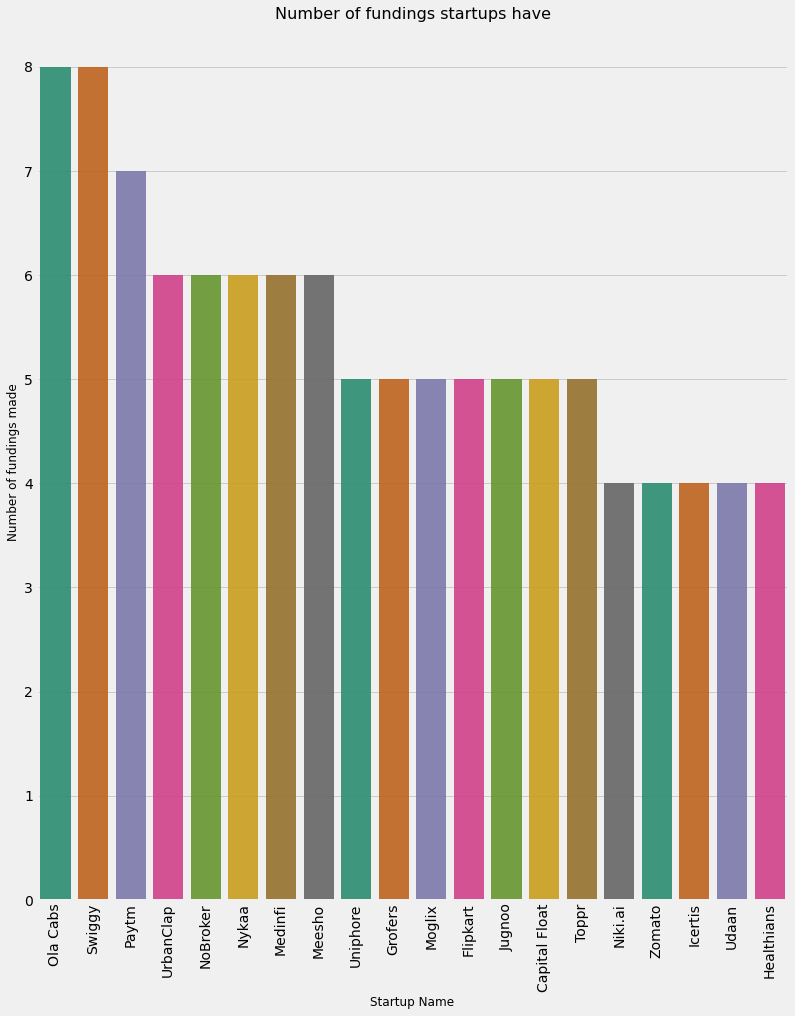

In [45]:
# Number of fundings each startup got
print("Total startups funded: ", len(data["StartupName"].unique()))
print(data["StartupName"].value_counts().head(10))
startupname = data['StartupName'].value_counts().head(20)

# Plot the data
plt.rcParams['figure.figsize']=(12,15)
sns.barplot(startupname.index, startupname.values,alpha=0.9, palette='Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name',fontsize=12)
plt.ylabel('Number of fundings made',fontsize=12)
plt.title("Number of fundings startups have", fontsize=16)
plt.show()

#### Which Kind of Industries are more preferred for Startups?

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: IndustryVertical, dtype: int64


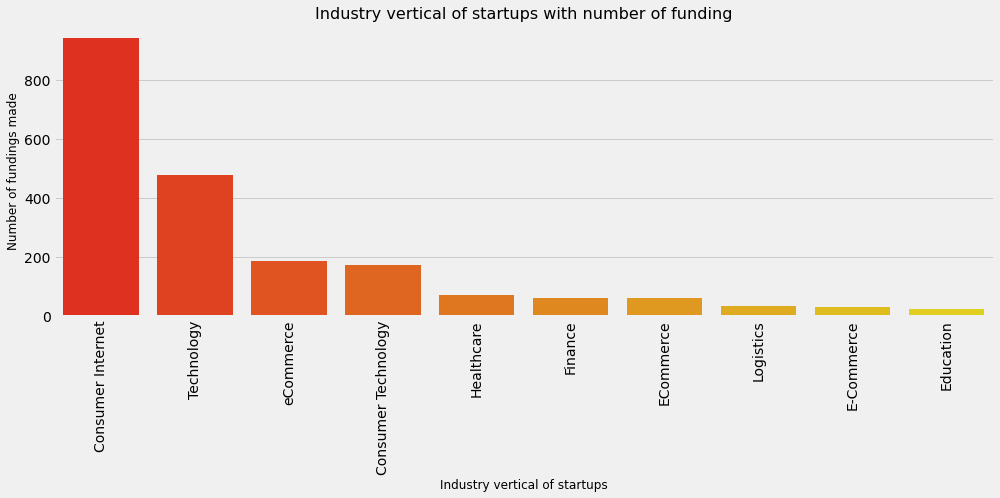

In [46]:
# Analyzing the industry of startups

# data cleaning
data['IndustryVertical']=data['IndustryVertical'].replace('nan','Consumer Technology')
industry = data['IndustryVertical'].value_counts().head(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

Online Lending Platform          11
Online Pharmacy                  10
Food Delivery Platform            8
Online Education Platform         5
Online lending platform           5
Online Lending                    5
Online Learning Platform          5
Education                         5
Online Food Delivery              4
Non-Banking Financial Company     4
Name: SubVertical, dtype: int64


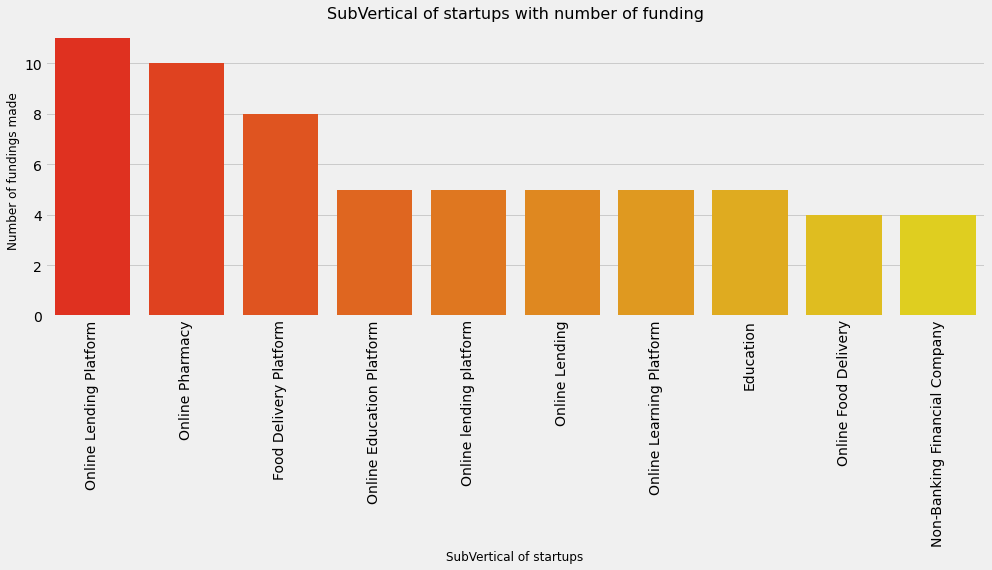

In [47]:
# Analyzing the sub vertical industries
industry = data['SubVertical'].value_counts()[1:].head(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('SubVertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("SubVertical of startups with number of funding", fontsize=16)
plt.show()

#### Does Location also play a role, In Determining the Growth of a Startup?

Bangalore    1022
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Name: City, dtype: int64


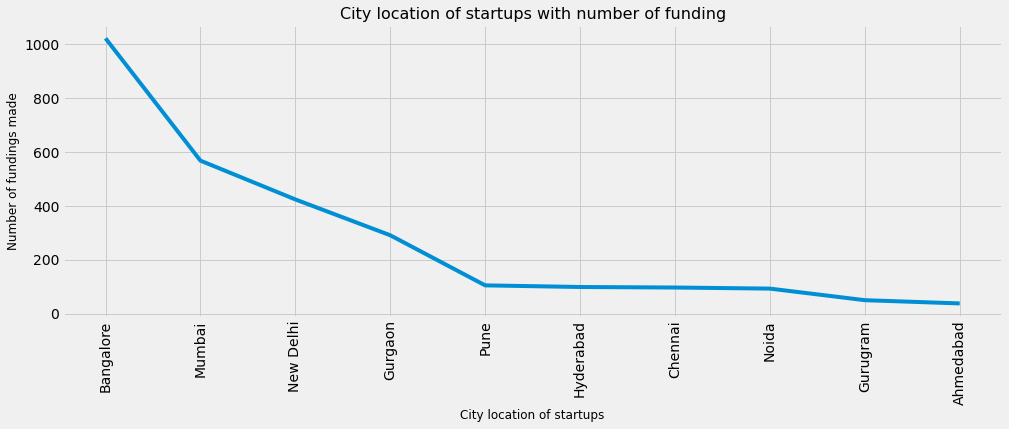

In [48]:
# Analyzing the effect of Cities on a startups

# data cleaning
data['City']=data['City'].replace(('Bengaluru', 'nan'),('Bangalore', 'Bangalore'))
city = data['City'].value_counts().head(10)
print(city)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.lineplot(city.index, city.values, palette = 'Wistia')
plt.xticks(rotation='vertical')
plt.xlabel('City location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("City location of startups with number of funding", fontsize=16)
plt.show()

#### Who plays the main role in Indian Startups Ecosystem?

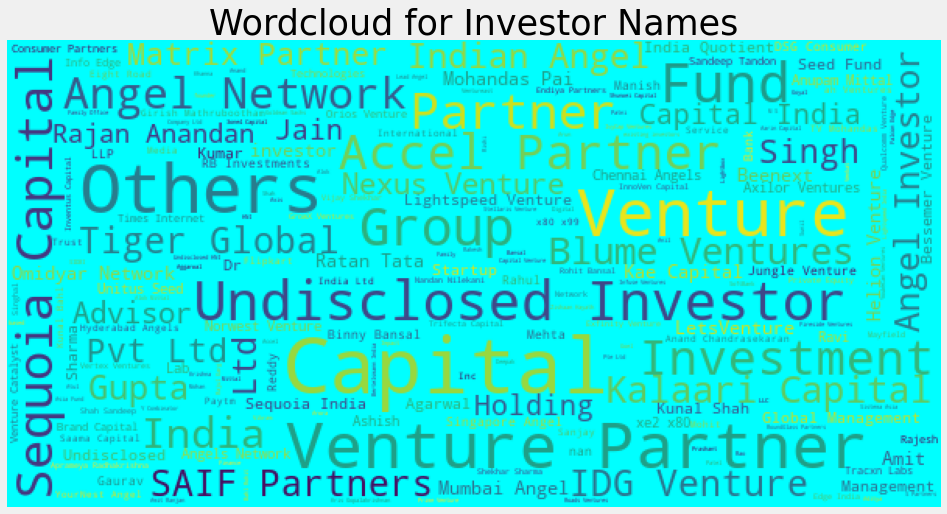

In [49]:
names = data["InvestorsName"][~pd.isnull(data["InvestorsName"])]
wordcloud = WordCloud(max_font_size=50,width=600,height=300,background_color='cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names",fontsize=35)
plt.axis("off")
plt.show()

Undisclosed Investors       136
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Accel Partners               12
Brand Capital                11
Venture Catalysts            11
SAIF Partners                10
Name: InvestorsName, dtype: int64


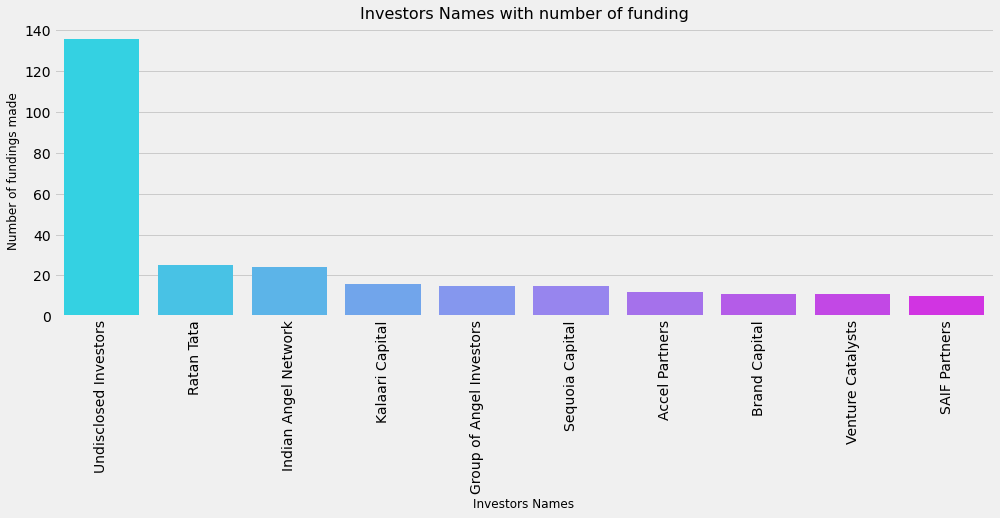

In [50]:
# Analyzing the investors of startups

# Data cleaning
data['InvestorsName'][data['InvestorsName']=='Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='Undisclosed investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='Undisclosed Investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='Undisclosed'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']=='nan'] = 'Undisclosed Investors'

# Check the value counts
investors = data['InvestorsName'].value_counts().head(10)
print(investors)

# Plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(investors.index, investors.values, palette = 'cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

#### What are the different Types of Funding for Startups?

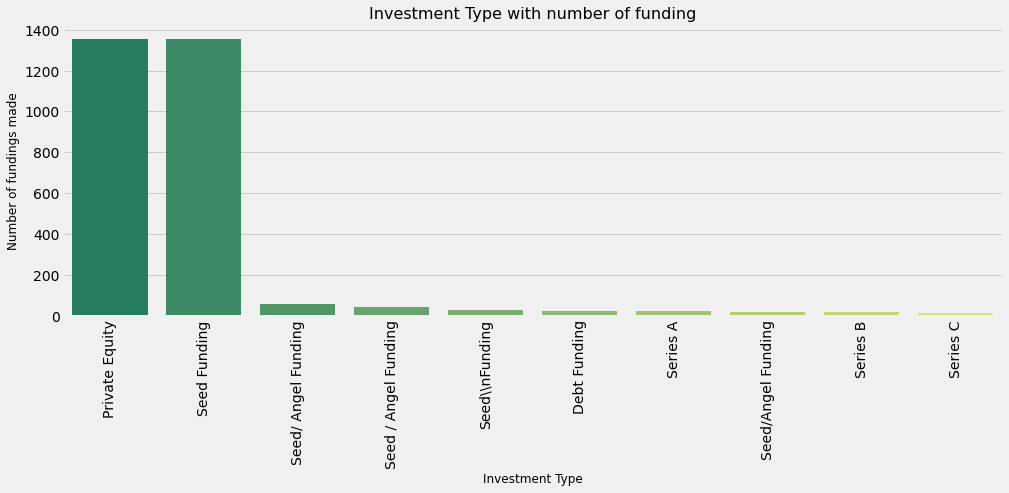

In [51]:
# Analyzing the Investment
investment = data['InvestmentType'].value_counts().head(10)

# Data Cleaning
data['InvestmentType'][data['InvestmentType']=='SeedFunding'] = 'Seed Funding'
data['InvestmentType'][data['InvestmentType']=='Crowd funding'] = 'Crowd Funding'
data['InvestmentType'][data['InvestmentType']=='PrivateEquity'] = 'Private Equity'
data['InvestmentType'][data['InvestmentType']=='PrivateEquity']

# Plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(investment.index, investment.values, palette = 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()